In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


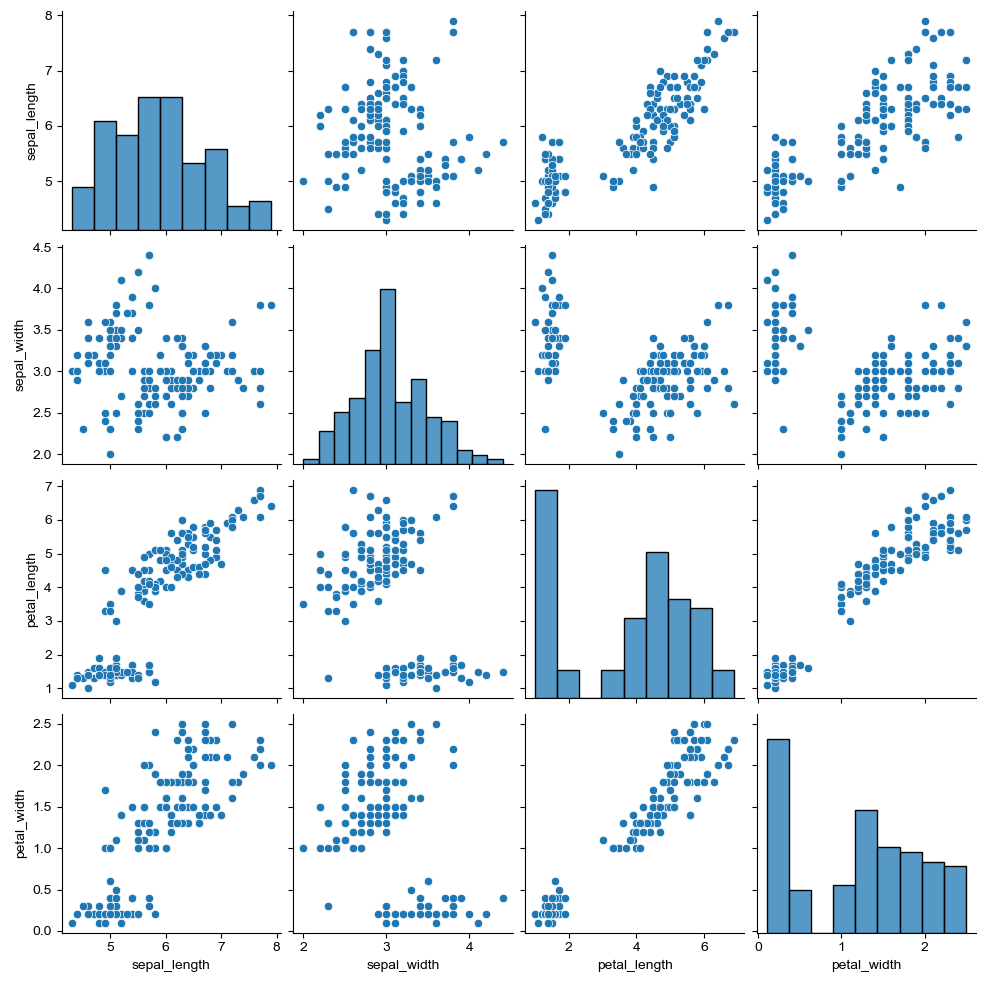

In [4]:
sns.pairplot(df)
sns.set_theme(style= 'whitegrid', palette= 'seismic')

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
scaler.fit(df[['sepal_length','sepal_width','petal_length','petal_width']])

StandardScaler()

In [9]:
scaled_features = scaler.transform(df[['sepal_length','sepal_width','petal_length','petal_width']])
scaled_features[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [10]:
df_new = pd.DataFrame(scaled_features, columns= df.columns[:-1])
df_new[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [11]:
X= df_new
X[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
y= df['species']
y[:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [15]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
prediction = model.predict(X_test)
prediction[17:25]

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica'], dtype=object)

In [17]:
y_test[17:25]

69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
Name: species, dtype: object

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [19]:
error_rate = []

In [21]:
for i in range(1,30):
    model_final = KNeighborsClassifier(n_neighbors=i)
    model_final.fit(X_train, y_train)
    prediction_final = model_final.predict(X_test)
    error_rate.append(np.mean(prediction_final != y_test))

Text(0, 0.5, 'Error Rates')

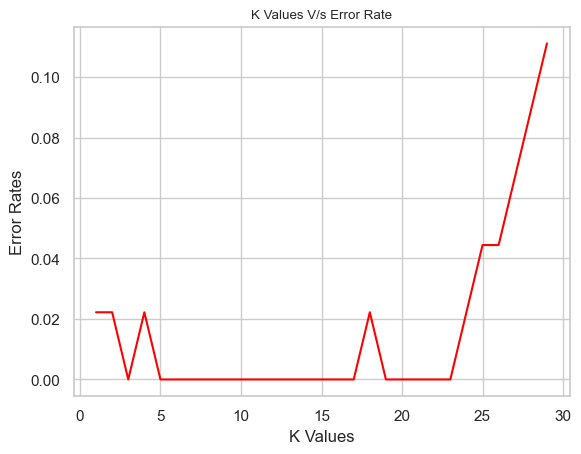

In [22]:
sns.lineplot(x= range(1,30), y= error_rate, color= 'red')
sns.set_theme(context= 'paper', style = 'darkgrid')
plt.title("K Values V/s Error Rate")
plt.xlabel("K Values")
plt.ylabel("Error Rates")

In [23]:
knn= KNeighborsClassifier(n_neighbors=9)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [25]:
knn_prediction = knn.predict(X_test)
knn_prediction[17:25]

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica'], dtype=object)

In [26]:
y_test[17:25]

69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
Name: species, dtype: object

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,knn_prediction))
print(classification_report(y_test,knn_prediction))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

